## Mobile Price Classification
Данный дата сет представляет собой набор характеристик соврменнных смартфонов.
https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/
## Краткое описание датасета
(a)
Этот набор данных содержит информацию о характеристиках современных мобильных телефонов Нет информации рельные данные или нет.е)

(b)
Датасет включает следующие атрибуты:

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_frame = pd.read_csv("../ML/test.csv")
data_frame.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

## Для упрощения задачи, выберем следующие атрибуты:

battery_power - Общая энергия, которую аккумулятор может хранить за один раз, измеряется в мАч

clock_speed - скорость, с которой микропроцессор выполняет инструкици  

fc - Мегапиксельная передняя камера

int_memory - Внутренняя память в гигабайтах

mobile_wt - Вес мобильного телефона

In [10]:
selected_columns = ['id','battery_power','clock_speed','fc','int_memory','mobile_wt']
df = data_frame[selected_columns].sort_values(by='id', ascending=True)
df

,id,battery_power,clock_speed,fc,int_memory,mobile_wt
0,1,1043,1.8,14,5,193
1,2,841,0.5,4,61,191
2,3,1807,2.8,1,27,186
3,4,1546,0.5,18,25,96
4,5,1434,1.4,11,49,108
...,...,...,...,...,...,...
995,996,1700,1.9,0,54,170
996,997,609,1.8,0,13,186
997,998,1185,1.4,1,8,80
998,999,1533,0.5,0,50,171


## Анализ атрибутов датасета
## (a) Среднее значение, ско

In [12]:
mean_values = df.drop('id', axis=1).mean()
std_values = df.drop('id', axis=1).std()
print("Средние значения:")
print(mean_values)

print("\nСтандартное отклонение (ско):")
print(std_values)

Средние значения:
battery_power    1248.5100
clock_speed         1.5409
fc                  4.5930
int_memory         33.6520
mobile_wt         139.5110
dtype: float64

Стандартное отклонение (ско):
battery_power    432.458227
clock_speed        0.829268
fc                 4.463325
int_memory        18.128694
mobile_wt         34.851550
dtype: float64


## (b) Построить гистограмму распределения значений, определить есть ли выбросы

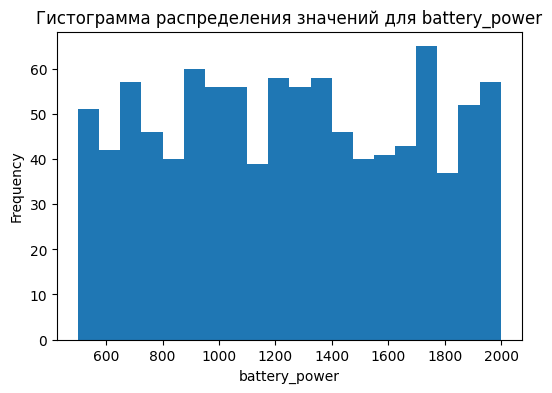

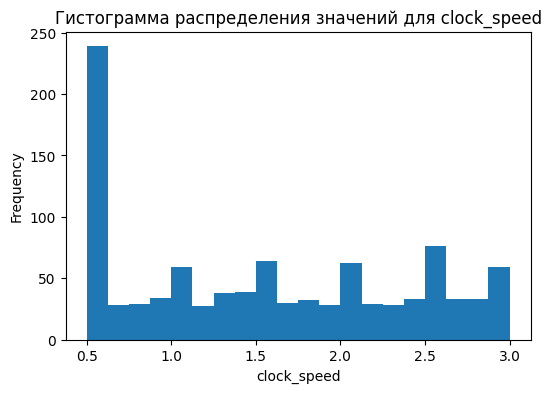

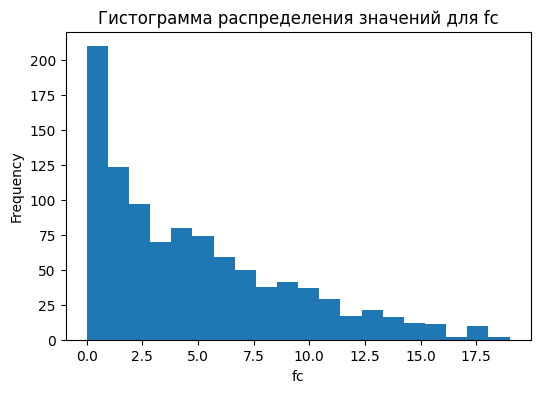

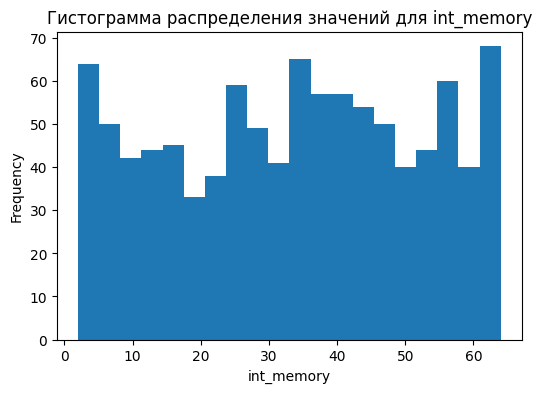

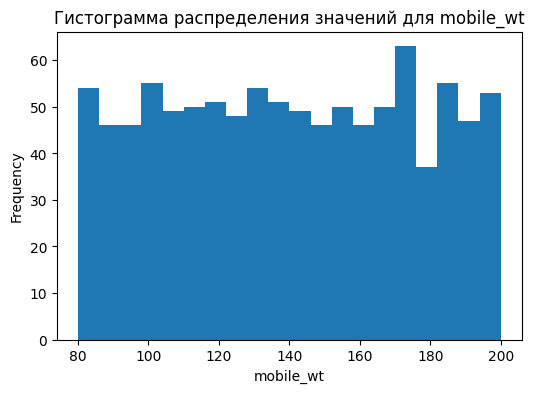

Количество выбросов в battery_power : 0
Количество выбросов в clock_speed : 0
Количество выбросов в fc : 14
Количество выбросов в int_memory : 0
Количество выбросов в mobile_wt : 0


In [16]:
for column in df.drop('id', axis=1).columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column], bins=20)
    plt.title(f'Гистограмма распределения значений для {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

for column in df.drop('id', axis=1).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Количество выбросов в {column} : {str(len(outliers))}")

## (c) Определим наличие пропущенных значений для каждого атрибута

In [17]:
for column in df.drop('id', axis=1).columns:
    missing = df[column].isna().sum()
    print(f"Пропущенных значений в {column} : {missing}")

Пропущенных значений в battery_power : 0
Пропущенных значений в clock_speed : 0
Пропущенных значений в fc : 0
Пропущенных значений в int_memory : 0
Пропущенных значений в mobile_wt : 0


## (d) Варианты обработки пропущенных значений

    Заполнением пропущенных значений (NaN), например средним или медианой

df_normal = df.fillna(df.mean())

В некоторых случаях, заполнение пропущенных значений средним значением может быть разумным, особенно если пропущенные значения небольшое количество и несущественны для цели анализа. Однако важно тщательно оценить контекст и природу данных, а также рассмотреть альтернативные методы обработки пропущенных значений, такие как интерполяция

    Интерполяцией пропущенных значений на основе соседних значений

df_interpolated = df.interpolate()

Например у нас имеется следующий датафрейм: | | A | B | |-|---|---| |0|1.0|3.0| |1|2.0|3.0| |2|Nan|3.0| |3|4.0|3.0|

Когда метод interpolate() обрабатывает этот датафрейм, он будет использовать ближайшие известные значения для интерполяции пропущенных значений. Например, значение NaN в строке 2 столбца 'A' будет интерполировано между 2.0 и 4.0 на основе соседних строк с индексами 1 и 3.

По умолчанию, interpolate() использует линейную интерполяцию, но можно задать и другие методы интерполяции, такие как "polynomial", "spline", "barycentric", и так далее, в зависимости от наших потребностей.

## Определение корреляции между параметрами
## (a, b) Определим какие атрибуты высококоррелированы, а также характер корреляции

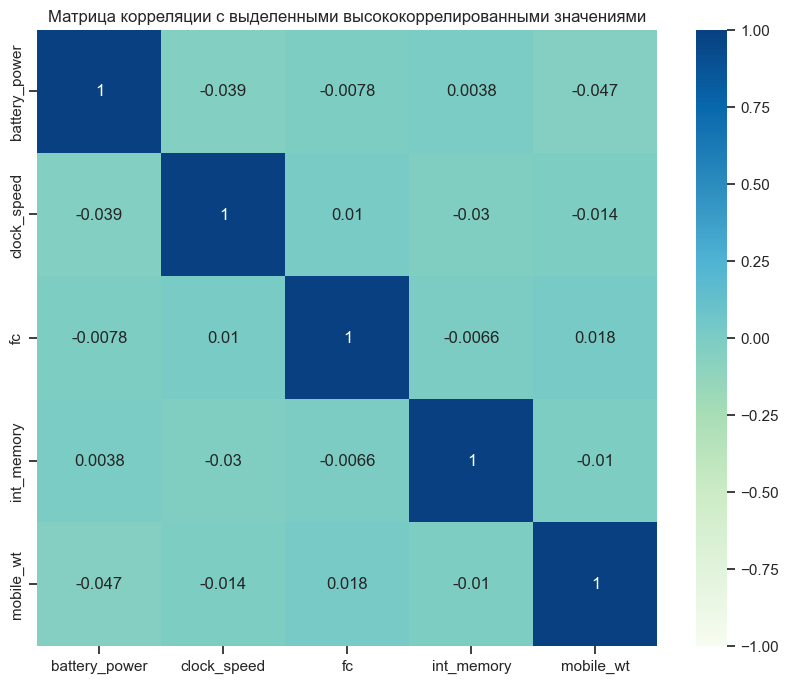

In [29]:
corr = df.drop('id', axis=1).corr()

plt.figure(figsize=(10, 8))
plt.title("Матрица корреляции с выделенными высококоррелированными значениями")
sns.heatmap(corr, annot=True, cmap="GnBu", vmin=-1, vmax=1)


threshold = 0.7

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        if i != j and (corr.iloc[i, j] >= threshold or corr.iloc[i, j] <= -threshold):
            plt.text(i+0.5, j+0.5, f"{corr.iloc[i, j]:.2f}", ha="center", va="center", fontsize=10, color="black", backgroundcolor="red")


plt.show()

## (a)
В данном случае мы получаем матрицу корреляции 'corr' (в последствии тепловую карту на ее основе с цветами желтый, зеленый, синий*), где каждый ее элемент представляет коэффициент корреляции Пирсона между соответствующими парами атрибутов (функция corr() может принимать параметр для определения метода корреляции, method{‘pearson’, ‘kendall’, ‘spearman’}, по умолчанию 'pearson'*). Коэффициент корреляции Пирсона может принимать значения от -1 до 1 и указывает на степень и направление линейной корреляции:

1: Положительная линейная корреляция.
0: Отсутствие линейной корреляции.
-1: Отрицательная линейная корреляция.
Чем сильнее отклонение от 0, тем сильнее корреляция между парами. Для определения высококоррелированых атрибутов задали порог в 0,7 и -0,7 соответственно, а также добавили красный фон таким ячейкам. Данный порог выставляется по желанию, но зачастую используют именно такой.

## Характер корреляции
На всех примерах видео что значение корреляции очень мало, поэтому связи нет.

Однако стоит отметить, что коэффициент корреляции близок к 0 не всегда означает отсутствие взаимосвязи между переменными, так как некоторые нелинейные связи могут быть недетектируемыми с использованием линейных методов анализа корреляции
и.

## (b)В моем примере не оказалось пар с корреляцией равной 0, но можно выделить самую минимальную - int_memory и battery_power


Построим матрицу графиков рассеивания и проанализируем полученные результаты
## (c) Матрица графиков рассеивания

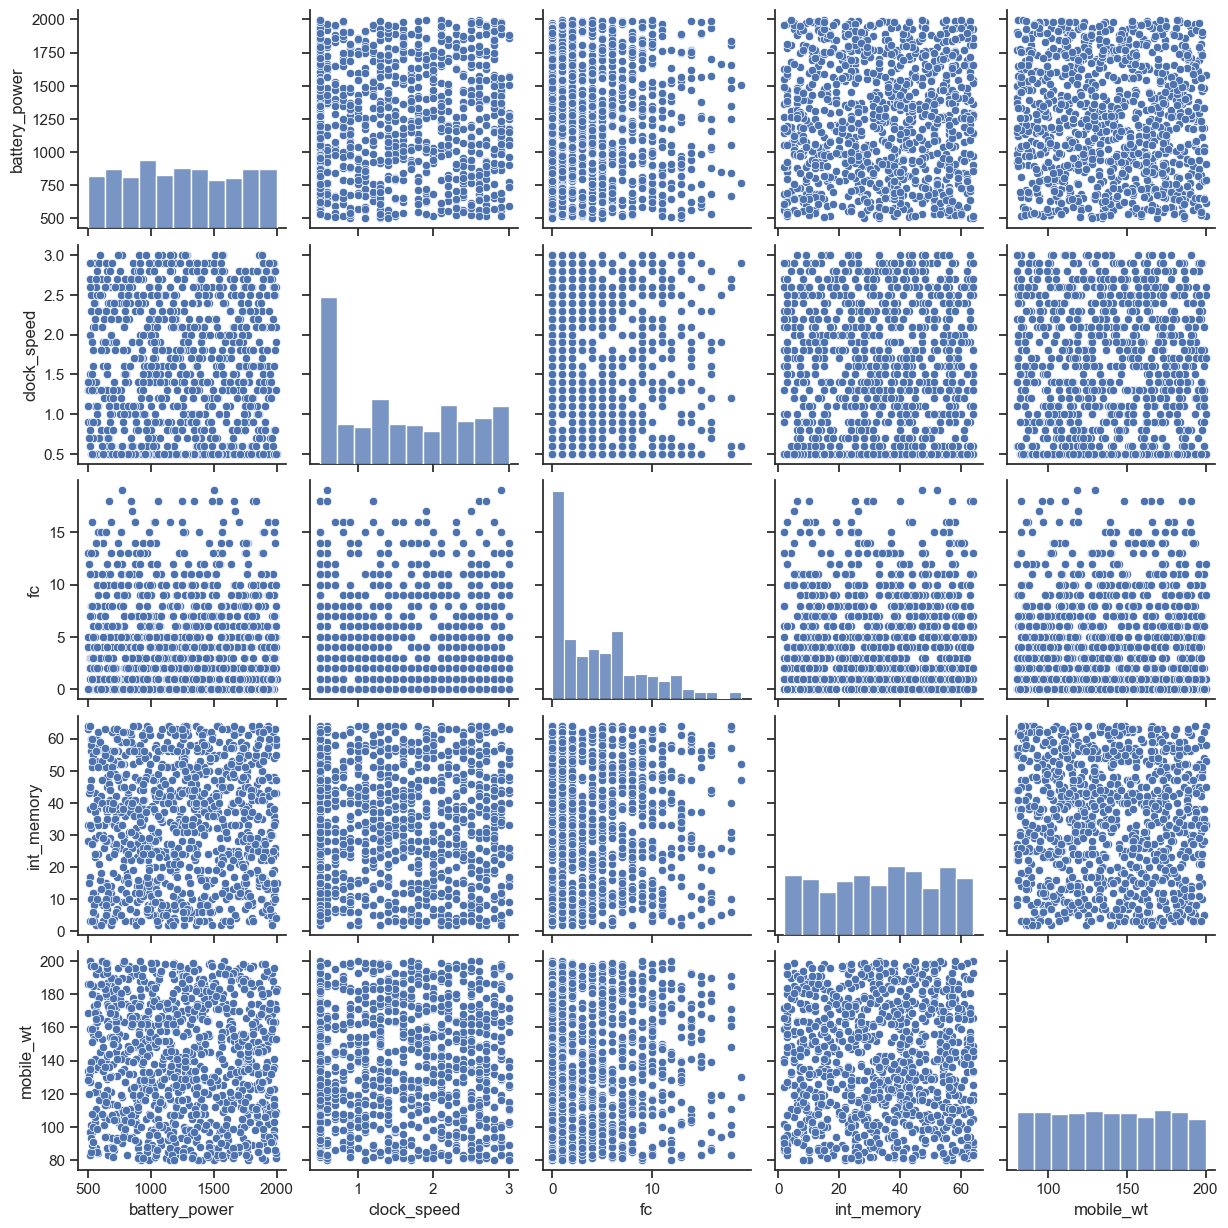

In [21]:
sns.set(style="ticks")
sns.pairplot(df.drop('id', axis=1))
plt.show()

## (d) Анализ полученных результатов
В полученной матрице графиков рассеивания мы можем оценить степень связи между параметрами. Так в нашем случае, по графикам можно увидеть что закономерностей нет:

Графики рассеивания не показывают явной линейной связи между переменными. Это означает, что изменения в одной переменной не сопровождаются определенными изменениями в другой переменной.

Отсутствие линейной связи не исключает наличие нелинейных зависимостей между переменными. В некоторых случаях связь между переменными может быть неочевидной на графиках рассеивания, тут я пошел в warface, но проявляться через сложные нелинейные взаимодействия.

А также у меня возникли вопросы：

Что если точки на графики рассеивания расположены хаотично по всей области видимого графика ?

И что означают идеально веритакальные и горизонтальные расположение точек, формирующих линию ?
